# Day 3: Historical

## Load libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['axes.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'
plt.rc('font', family='Georgia')

## Load data

In [2]:
df_men = pd.read_csv("./../data/google_trends_5_years_international_mens_day.csv")
df_women = pd.read_csv("./../data/google_trends_5_years_international_womens_day.csv")

## Data manipulation

In [3]:
df = pd.merge(left=df_men, right=df_women, on='Week')
df = df.rename(columns={'International_Mens_Day_Mexico':'Int_Mens_Day_Popularity',
                        'International_Womens_Day_Mexico':'Int_Womens_Day_Popularity'})

In [4]:
df['Int_Mens_Day_Popularity'] = df['Int_Mens_Day_Popularity'].apply(lambda x: "0.5" if x == "<1" else x).astype(float)
df['Int_Womens_Day_Popularity'] = df['Int_Womens_Day_Popularity'].apply(lambda x: "0.5" if x == "<1" else x).astype(float)

In [5]:
df['Week'] = pd.to_datetime(df['Week'])

In [6]:
df = pd.concat([df,df['Week'].dt.isocalendar()], axis=1).drop(columns="Week")

In [7]:
table_mens_day = df.pivot(index='week', columns='year', values='Int_Mens_Day_Popularity').loc[1:52]
table_womens_day = df.pivot(index='week', columns='year', values='Int_Womens_Day_Popularity').loc[1:52]

## Data Visualization: Base chart

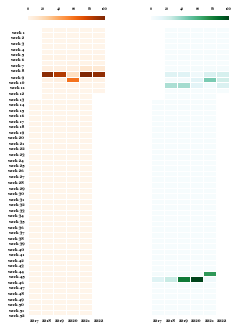

In [22]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True,
                               figsize=(1080/300,1920/300)
                              )
fig.subplots_adjust(wspace=0.6)

sns.heatmap(data=table_womens_day,
            vmin=0, vmax=100, center=50,
            cmap= 'Oranges',
            linecolor='white', linewidths=1,
            cbar_kws = dict(orientation='horizontal', pad=0.02,
                            location = 'top',
                           ),
            ax=ax1)


sns.heatmap(data=table_mens_day,
            vmin=0, vmax=100, center=50,
            cmap= 'BuGn',
            linecolor='white', linewidths=1,
            cbar_kws = dict(orientation='horizontal', pad=0.02,
                            location = 'top',
                           ),
            ax=ax2)


cbar_womens = ax1.collections[0].colorbar
cbar_womens.ax.tick_params(axis='both', length=0, labelsize=3, pad=5)

cbar_mens = ax2.collections[0].colorbar
cbar_mens.ax.tick_params(axis='both', length=0, labelsize=3, pad=5)



ax1.set_xlabel('')
ax1.set_ylabel('')
ax1.tick_params(axis='x', length=0, rotation=0, labelsize=4)
ax1.tick_params(axis='y', length=0, rotation=0, labelsize=4)
ax1.set_yticks(np.arange(1,53))
ax1.set_yticklabels(labels=[ 'week ' + str(i) for i in range(1,53) ])

ax2.set_xlabel('')
ax2.set_ylabel('')
ax2.tick_params(axis='x', length=0, rotation=0, labelsize=4)
ax2.tick_params(axis='y', length=0, rotation=0)

list_labels = ax1.get_xticklabels() + ax1.get_yticklabels() + ax2.get_xticklabels() + cbar_womens.ax.get_xticklabels() + cbar_mens.ax.get_xticklabels()
[ label.set_fontweight('bold') for label in list_labels ]

plt.show()

In [24]:
fig.savefig("./vector_day03_30daychartchallenge.svg")

## Final result (after Illustrator)